# Introdução
Neste projeto, desenvolvemos uma análise exploratória detalhada sobre a base de clientes de uma instituição bancária fictícia, com o objetivo de compreender o comportamento dos usuários e identificar padrões relevantes relacionados à evasão de clientes (churn). A retenção de clientes no setor bancário é uma prioridade estratégica, dado o alto custo de aquisição de novos usuários e o impacto direto na lucratividade.

Com uma base contendo informações de 10.000 clientes, abordamos diferentes dimensões — agrupamento de tipos de clientes, financeiro e de relacionamento — buscando insights que ajudem times como Marketing, Produtos, Relacionamento e CRM a tomarem decisões mais direcionadas e eficazes. Através de Python e bibliotecas como pandas, matplotlib e seaborn, conduzimos análises que segmentam a base, identificam oportunidades de crescimento, pontos de atenção e grupos com maior risco de evasão.

# Contexto

A análise tem como base diversas variáveis como idade, tempo de relacionamento com a instituição, pontuação de crédito, produtos contratados, satisfação, renda estimada, saldo em conta, e se o cliente está ou não ativo.

Diante do cenário competitivo entre instituições financeiras, a retenção de clientes passa a ser uma das principais frentes de atuação. Para isso, o banco precisa entender melhor o comportamento de sua base, identificando perfis com maior potencial de crescimento, aqueles que precisam de estímulo para reativação, e, principalmente, os que apresentam maior risco de evasão.

A análise foi estruturada em quatro frentes principais:

- Entendimento dos Perfis e Distribuição da Base de Clientes
- Potencial de Cross-Selling entre Ativos Engajados
- Oportunidades de Reativação entre Inativos
- Riscos de Evasão (Churn)

A partir dessas análises, o projeto entrega um conjunto de insights estruturados que podem servir como base para ações estratégicas em diferentes áreas do banco, visando não só a retenção de clientes, mas também o aumento do valor da base ativa e a reativação de perfis promissores.

## Importação da base de dados

*Os dados utilizados neste projeto foram obtidos da comunidade Kaggle e estão disponíveis publicamente desde 2022, podendo ser acessados [neste link](https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn?resource=download)*

## Bibliotecas


In [ ]:
# Tratamento e visualização
import pandas as pd
import numpy as np

#Conexão SQL
import sqlite3

# Visualização dos dados
import matplotlib.pyplot as plt
import seaborn as sns

In [640]:
# O arquivo original está em .csv, vamos transformá-lo em banco de dados para trabalharmos via SQL
caminho = r'C:\Users\pedro\OneDrive\Área de Trabalho\Estudos\Potfólio\ProjetosPython\Analise-de-Credito\Material\Customer-Churn-Records.csv'

#Carregando o csv em um dataframe
df_originalCSV = pd.read_csv(caminho)

#Criando a conexão na memória
conn = sqlite3.connect(':memory:')

#Jogando o DF no banco
df_originalCSV.to_sql('Credito', conn, index=False, if_exists='replace')

df = pd.read_sql('SELECT * FROM Credito', conn)
df

c:\Users\pedro\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\generic.py:2882: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


## Entendendo os dados
Com a base importada, vamos entender os dados para fazermos as análises. Mas antes, vamos ver o dicionário das variáveis:

- RowNumber - Corresponde ao número da linha do registro do cliente (sem efeito em nossa análise, droparemos a coluna);
- CustomerId - ID único de cada cliente (sem efeito em nossa análise, droparemos a coluna);
- Surname - Sobrenome do cliente (sem efeito em nossa análise, droparemos a coluna);
- CreditScore - Pontuação de crédito do cliente; 
- Geography - Localização do cliente;
- Gender - Gênero do cliente;
- Age - Idade do cliente;
- Tenure - Tempo de vínculo do cliente ao banco (ótimo indicativo para análise de churn);
- Balance - Saldo do cliente no banco (também um ótimo indicativo)
- NumOfProducts - Número de produtos que o cliente possui em nosso banco;
- HasCrCard - Se o cliente possui ou não cartão de crédito (0 para não e 1 para sim); 
- IsActiveMember - Se o cliente é membro ativo ou não do banco;
- EstimatedSalary - Salário estimado **anual** do cliente;
- Exited - Indica se o cliente saiu ou não do banco (0 para não e 1 para sim);
- Complain - Indica se o cliente fez alguma reclamação do banco (ótimo indicativo para churn - 0 para não e 1 para sim);
- Satisfaction Score - Pontuação de satisfação do banco pelo cliente em pesquisa;
- Card Type - Tipo de cartão que o cliente possui;
- Point Earned - Pontos ganhos pelo cliente ao usar o cartão de crédito do banco.


### Drop das colunas desnecessárias para nossa análise de churn e ajuste de variáveis

In [641]:
# Como nesse projeto estamos utilizadno sqlite3, vamos selecionar as colunas necessárias e não dropar as que não usaremos, devido a limitações do sqlite3. Além disso, como no sqlite3 não podemos usar ALTERTABLE ou RENAME COLUMN, vamos fazer uma nova base de dados com os dados corrigidos


# Criando a nova tabela com nomes de colunas sem espaços
conn.execute('''
CREATE TABLE CreditoCorrigido AS
SELECT
    CreditScore,
    Geography,
    Gender,
    Age,
    Tenure,
    Balance,
    NumOfProducts,
    HasCrCard,
    IsActiveMember,
    EstimatedSalary,
    Exited,
    Complain,
    "Satisfaction Score" AS SatisfactionScore,
    "Card Type" AS CardType,
    "Point Earned" AS PointEarned
FROM Credito
''')

df_corrigido = pd.read_sql('SELECT * FROM CreditoCorrigido', conn)
df_corrigido.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,SatisfactionScore,CardType,PointEarned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


### Análise exploratória Inicial

In [642]:
df_corrigido.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,SatisfactionScore,CardType,PointEarned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [643]:
df_corrigido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Geography          10000 non-null  object 
 2   Gender             10000 non-null  object 
 3   Age                10000 non-null  int64  
 4   Tenure             10000 non-null  int64  
 5   Balance            10000 non-null  float64
 6   NumOfProducts      10000 non-null  int64  
 7   HasCrCard          10000 non-null  int64  
 8   IsActiveMember     10000 non-null  int64  
 9   EstimatedSalary    10000 non-null  float64
 10  Exited             10000 non-null  int64  
 11  Complain           10000 non-null  int64  
 12  SatisfactionScore  10000 non-null  int64  
 13  CardType           10000 non-null  object 
 14  PointEarned        10000 non-null  int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 1.1+ MB


In [644]:
df_corrigido.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,SatisfactionScore,PointEarned
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [645]:
for col in df_corrigido.columns:
    nulos = df_corrigido[col].isna().sum()
    vazios = (df_corrigido[col] == "").sum()
    duplicados = df_corrigido[col].duplicated().sum()

    print(f'Coluna: {col}')
    print(f'→ Dados nulos (NaN): {nulos}')
    print(f'→ Dados vazios (""): {vazios}')
    print(f'→ Dados duplicados (""): {duplicados}')
    print('-' * 10)

Coluna: CreditScore
→ Dados nulos (NaN): 0
→ Dados vazios (""): 0
→ Dados duplicados (""): 9540
----------
Coluna: Geography
→ Dados nulos (NaN): 0
→ Dados vazios (""): 0
→ Dados duplicados (""): 9997
----------
Coluna: Gender
→ Dados nulos (NaN): 0
→ Dados vazios (""): 0
→ Dados duplicados (""): 9998
----------
Coluna: Age
→ Dados nulos (NaN): 0
→ Dados vazios (""): 0
→ Dados duplicados (""): 9930
----------
Coluna: Tenure
→ Dados nulos (NaN): 0
→ Dados vazios (""): 0
→ Dados duplicados (""): 9989
----------
Coluna: Balance
→ Dados nulos (NaN): 0
→ Dados vazios (""): 0
→ Dados duplicados (""): 3618
----------
Coluna: NumOfProducts
→ Dados nulos (NaN): 0
→ Dados vazios (""): 0
→ Dados duplicados (""): 9996
----------
Coluna: HasCrCard
→ Dados nulos (NaN): 0
→ Dados vazios (""): 0
→ Dados duplicados (""): 9998
----------
Coluna: IsActiveMember
→ Dados nulos (NaN): 0
→ Dados vazios (""): 0
→ Dados duplicados (""): 9998
----------
Coluna: EstimatedSalary
→ Dados nulos (NaN): 0
→ Dados vaz

In [646]:
for col in df_corrigido.columns:
    print(f'Coluna {col}')
    print(df_corrigido[col].unique())
    print(f'- '*10)

Coluna CreditScore
[619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709

In [647]:
#Vamos separar as colunas filtradas para utilizarmos nas consulta via SQL mais p frente
colunas_utilizadas = ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain', 'SatisfactionScore', 'CardType',	'PointEarned']

## Distribuição dos dados
Como nós não temos dados nulos, vazios e, os duplicados não comprometem nossa análise, vamos ver como está a distribuição dos valores em nossas colunas **numéricas**.

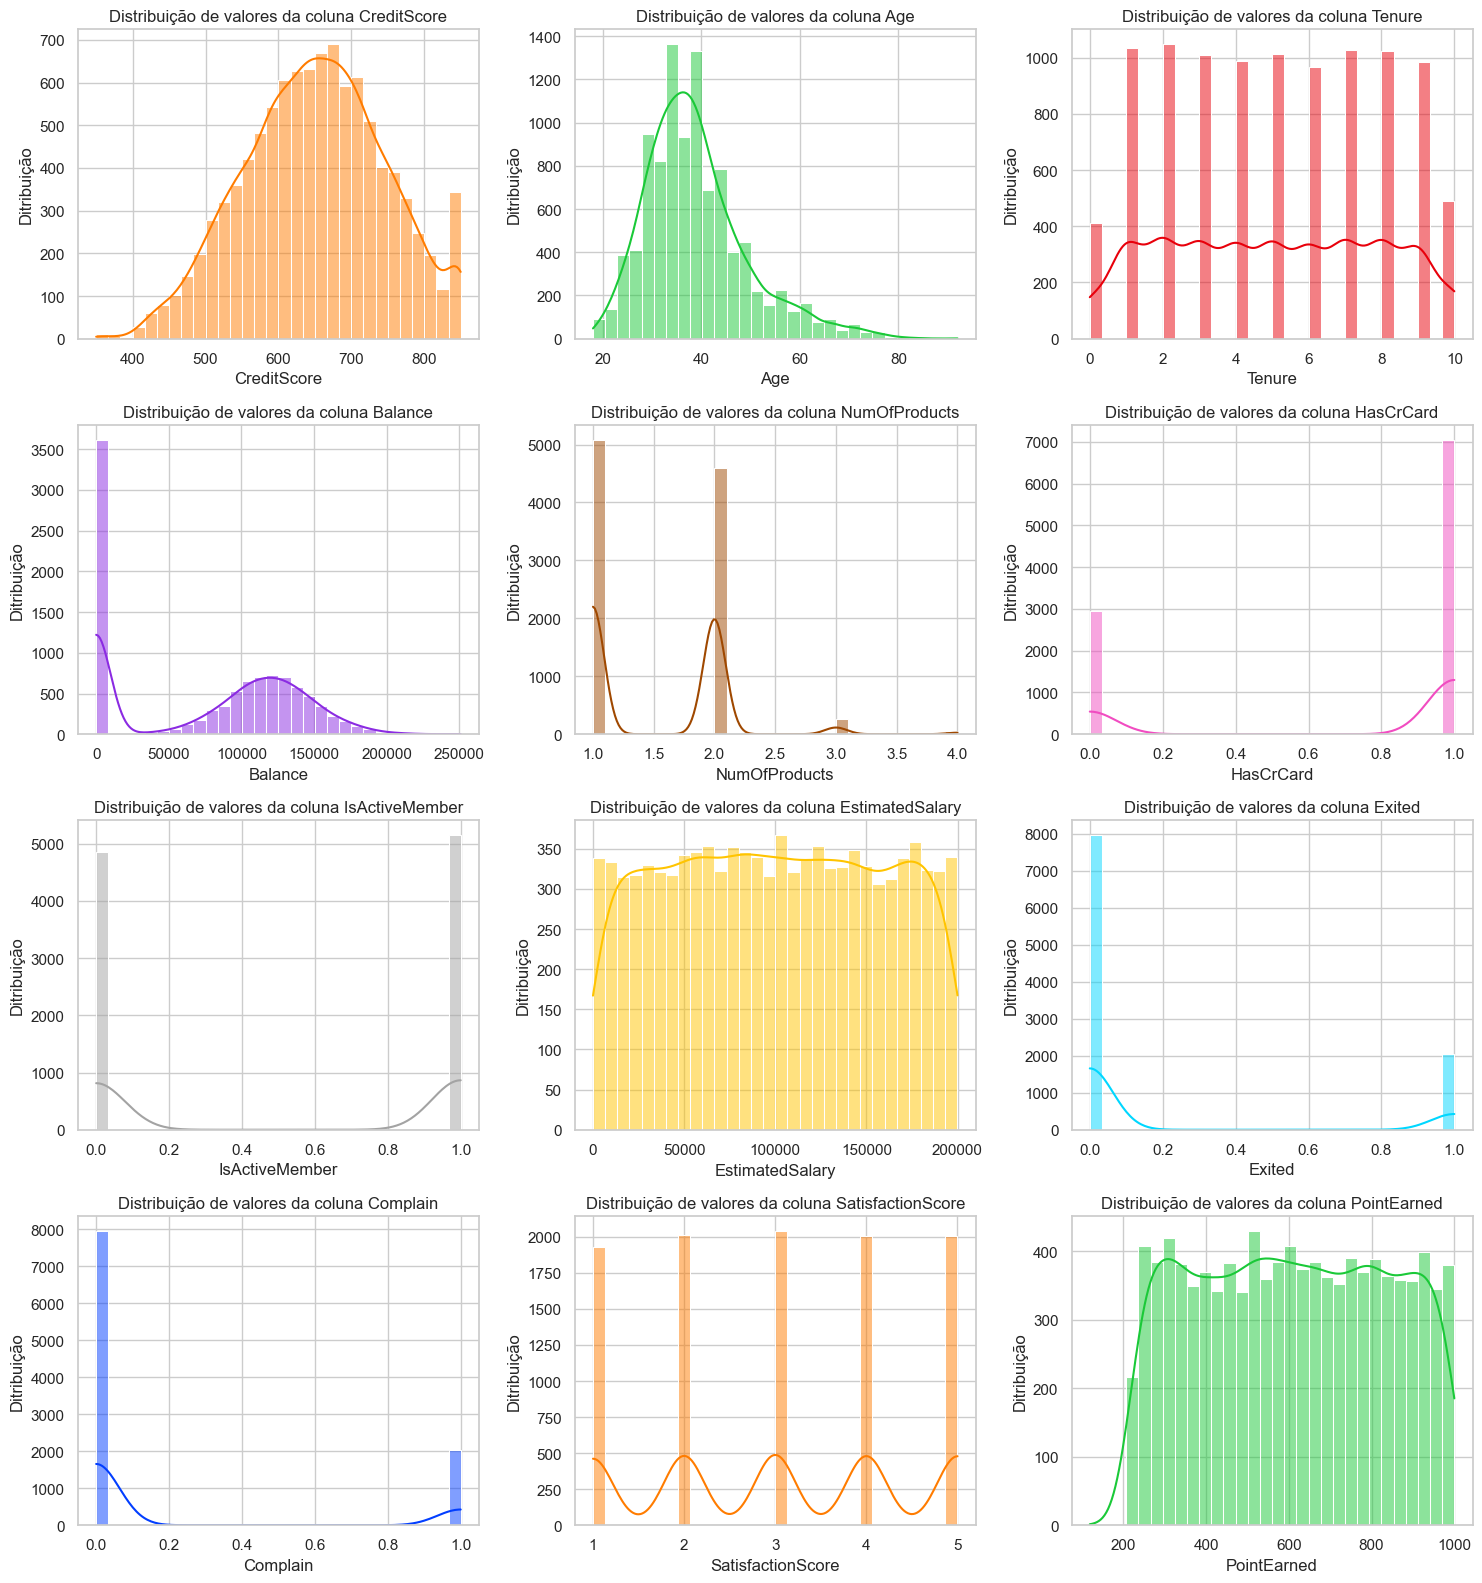

In [648]:
colunas_numericas = df_corrigido.select_dtypes(include='number').columns
total = len(colunas_numericas)

#cores
cores = sns.color_palette('bright')

#Tamanho
n_colunas = 3
n_linhas = (total + 1) // n_colunas
plt.figure(figsize=(n_colunas * 5, n_linhas * 4))

#Histograma
for i, coluna in enumerate(colunas_numericas, 1):
    plt.subplot(n_linhas, n_colunas, i)
    sns.histplot(df_corrigido[coluna], bins=30, kde=True, color=cores[i % len(cores)])
    plt.title(f'Distribuição de valores da coluna {coluna}')
    plt.xlabel(coluna)
    plt.ylabel('Ditribuição')

plt.tight_layout()
plt.show()

### Avaliando a distribuição de valores de cada variável independente, podemos concluir inicialmente:

- O score de crédito (ScoreCredit) apresenta uma distribuição normal, com concentração maior entre 600 e 700 pontos, sugerindo que a maioria dos clientes possui uma pontuação de crédito mediana, o que pode indicar baixo risco, mas também nos dá espaço para estratégias de fidelização.
- A idade dos clientes (Age) é assimétrica à direita, com maior concentração na faixa entre 30 e 45 anos, o que sugere oportunidades para estratégias de marketing e fidelização direcionadas a esse perfil.
- O tempo de vínculo de nossos clientes (Tenure) apresenta uma distribuição uniforme, indicando que a base de clientes é bem distribuída ao longo dos anos de permanência. 
- No saldo dos clientes (Balance), há uma concentração relevante (e preocupante) de saldos zerados, o que nos alerta para possíveis churns no futuro. Além destes, o saldo é seguido por uma cauda à direita de clientes com saldo elevado, sugerindo a existência de distintos perfis em nossa base — entre clientes inativos ou c pouco engajamento e outros com maior potencial financeiro.
- No número de produtos (NumOfProducts), a maioria dos clientes possui 0 ou 1, com poucos utilizando 3 ou mais. Pode indicar uma oportunidade de venda cruzada de novos produtos, sejam eles de crédito, seguros ou serviços complementares.
- As variáveis *HasCrCard, IsActiveMember, Exited e Complain* são binárias, podendo ser analisadas uma a uma. Vamos a elas:
    - **HasCrCard** - Cerca de 70% de nossa base possui cartão de crédito, o que abre margem para fidelização via crédito entre 30% do todo.
    - **IsActiveMember** - Cerca de 50% da nossa base **NÃO** está ativa, o que gera um grande alerta. Precisamos entender os motivos da inatividade e criar estratégias para reengajar esses clientes.
    - **Exited** - Somente 20% dos clientes nunca saíram do banco.Temos uma alta rotatividade, mas há indícios de retorno por parte de alguns. É essencial investigar os fatores que levam ao abandono e o que motiva o retorno.
    - **Complain** - A grande maioria dos clientes nunca fez alguma reclamação do nosso banco ou serviços (quase 80%), o que mostra uma percepção positiva geral do banco. Ainda assim é necessário entender os casos de insatisfação para melhoria contínua.
- No salário estimado (EstimatedSalary), nos é apresentado uma distribuição uniforme, sugerindo boa diversidade no perfil de renda dos clientes.
- A satisfação com nosso banco (Satisfaction Score) apresenta uma distribuição equilibrada, sem predominância de notas altas ou baixas.
- A distribuição de pontos (Point Earned) está bem espalhada, com leve concentração nas faixas mais elevadas, indicando que os clientes mais engajados estão sendo recompensados.

### Com os dados compreendidos e suas distribuições analisadas, vamos explorar algumas análises para um entendimento completo

### Análises

1. Entendimento dos Perfis e Distribuição da Base de Clientes
- **Objetivo**: Consolidar os três perfis identificados (Ativos, Inativos e Evadidos) com base em variáveis comportamentais, financeiras e de relacionamento.
- **Insight esperado**: Observar o quanto cada grupo representa da base total (completando os 10 mil clientes) e fornecer um panorama claro para ações direcionadas por time (Marketing, CRM, Produtos e Relacionamento).


2. Potencial de Cross-Selling entre Ativos Engajados
- **Objetivo**: Encontrar clientes ativos com maior abertura para aquisição de novos produtos (seguros, crédito, investimentos).
- **Variáveis-chave**: NumOfProducts, EstimatedSalary, ScoreCredit, PointEarned, IsActiveMember.
- **Insight esperado**: Criar segmentações inteligentes para campanhas de upsell e cross-sell, especialmente entre os mais satisfeitos e engajados.


3. Oportunidades de Reativação entre Inativos
- **Objetivo**: Mapear quais perfis inativos demonstram potencial financeiro ou histórico de engajamento que justifique esforços de reativação.
- **Variáveis-chave**: NumOfProducts, EstimatedSalary, ScoreCredit, PointEarned, SatisfactionScore.
- **Insight esperado**: Priorizar os inativos de maior valor para ações de CRM personalizados.


4. Riscos de Evasão no Grupo Ativo e Inativo
- **Objetivo**: Identificar sinais de churn nos clientes ainda na base, principalmente entre os inativos e parte dos ativos com engajamento baixo.
- **Variáveis-chave**: Exited, Age, Tenure, Balance, IsActiveMember, SatisfactionScore, Complain.
- **Insight esperado**: Antecipar comportamentos semelhantes aos dos evadidos para criação de campanhas de retenção preventivas.

### Perfil dos clientes que saíram

Para iniciar nossa análise, é essencial compreendermos tanto o perfil geral dos clientes quantos o perfil daqueles que optaram por encerrar suas contas com o banco. Entender fatores como idade, renda, tempo de relacionamento, score e outros indicadores nos permitirá traçar estratégias melhores de retenção. 

Para isso, os clientes serão segmentados em três grupos distintos com base nos dados abaixo que falam sobre os clientes que saíram do banco e dos que estão com as contas ativas ou não.

![alt text](clientesEvadidosXMembrosAtivos.png)

Com base nisso, os grupos serão:

- **Grupo Ativo** - Clientes atualmente ativos 
- **Grupo Inativo** - Clientes que possuem a conta, mas sem movimentações recentes.
- **Grupo Evadido (churn)** - Clientes que encerraram suas contas.

#### 🟩 | Grupo Ativo 

*Clientes com conta ativa e movimentação recente. Representam o público engajado da base e são prioritários para estratégias de manutenção e fidelização.*

In [649]:
# Para isso, vamos filtrar os clientes em uma query contendo aqueles que não saíram de nosso banco, mas que também estão com as contas ativas.
query = f'''
SELECT {", ".join(colunas_utilizadas)} 
FROM CreditoCorrigido
WHERE Exited = 0 AND IsActiveMember = 1
'''

df_ativos = pd.read_sql(query, conn)
df_ativos

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,SatisfactionScore,CardType,PointEarned
0,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
1,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
2,822,France,Male,50,7,0.00,2,1,1,10062.80,0,0,2,SILVER,206
3,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,0,3,GOLD,251
4,684,France,Male,27,2,134603.88,1,1,1,71725.73,0,0,3,GOLD,342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4411,602,Germany,Male,35,7,90602.42,2,1,1,51695.41,0,1,3,GOLD,764
4412,673,Germany,Male,47,1,183579.54,2,0,1,34047.54,0,0,5,PLATINUM,772
4413,606,Spain,Male,30,8,180307.73,2,1,1,1914.41,0,0,3,SILVER,567
4414,841,Spain,Male,28,4,0.00,2,1,1,179436.60,0,0,5,GOLD,393


In [650]:
df_ativos.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,SatisfactionScore,PointEarned
count,4416.000000,4416.000000,4416.000000,4416.000000,4416.000000,4416.000000,4416.0,4416.000000,4416.0,4416.000000,4416.000000,4416.000000
mean,654.213542,38.963995,4.957201,73304.717314,1.535779,0.707654,1.0,99253.061793,0.0,0.001359,3.030797,607.028306
std,95.145008,11.765771,2.891661,62486.761557,0.511332,0.454892,0.0,57391.253792,0.0,0.036840,1.405523,226.011166
min,405.000000,18.000000,0.000000,0.000000,1.000000,0.000000,1.0,90.070000,0.0,0.000000,1.000000,206.000000
25%,588.750000,31.000000,2.000000,0.000000,1.000000,0.000000,1.0,50781.767500,0.0,0.000000,2.000000,410.000000
50%,656.000000,37.000000,5.000000,92212.200000,2.000000,1.000000,1.0,98947.335000,0.0,0.000000,3.000000,605.000000
75%,719.000000,43.000000,7.000000,125912.632500,2.000000,1.000000,1.0,148182.365000,0.0,0.000000,4.000000,802.250000
max,850.000000,92.000000,10.000000,212778.200000,3.000000,1.000000,1.0,199953.330000,0.0,1.000000,5.000000,1000.000000


##### Perfil do Grupo Ativo

- Perfil Geral: Clientes com idade média de 39 anos e score de crédito médio de 654, indicando um perfil relativamente jovem e com certos riscos financeiros.
- Saldo: Média de renda de R$  92 mil/ano e 25% com saldo zerado — possível sinal de pouco engajamento em parte da base, apesar do alto potencial financeiro médio.
- Produtos: A maioria possui 2 produtos, e praticamente todos têm cartão de crédito.
- Satisfação e Pontuação: Média de satisfação em 3 (neutra) e pontuação média acumulada em 607 — indício de envolvimento moderado e possibilidade de fidelização com estímulo certo.

#### 🟨 | Grupo Inativo 

*Clientes com conta aberta, mas sem movimentações recentes. Indicam potencial risco de evasão e requerem ações de reativação.*

In [651]:
# Para os inativos, vamos filtra-los em uma query contendo aqueles que não cancalaram suas contas, mas que não a movimentam mais.
query = f'''
SELECT {", ".join(colunas_utilizadas)} 
FROM CreditoCorrigido
WHERE Exited = 0 AND IsActiveMember = 0
'''

df_inativos = pd.read_sql(query, conn)
df_inativos

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,SatisfactionScore,CardType,PointEarned
0,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
1,528,France,Male,31,6,102016.72,2,0,0,80181.12,0,0,3,GOLD,264
2,497,Spain,Male,24,3,0.00,2,1,0,76390.01,0,0,3,GOLD,249
3,476,France,Female,34,10,0.00,2,1,0,26260.98,0,0,3,SILVER,119
4,549,France,Female,25,5,0.00,2,0,0,190857.79,0,0,3,PLATINUM,549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3541,726,Spain,Male,36,2,0.00,1,1,0,195192.40,0,0,5,SILVER,560
3542,644,France,Male,28,7,155060.41,1,1,0,29179.52,0,0,5,DIAMOND,715
3543,800,France,Female,29,2,0.00,2,0,0,167773.55,0,0,4,PLATINUM,311
3544,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300


In [652]:
df_inativos.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,SatisfactionScore,PointEarned
count,3546.000000,3546.000000,3546.000000,3546.000000,3546.00000,3546.000000,3546.0,3546.000000,3546.0,3546.000000,3546.000000,3546.000000
mean,648.879301,35.470389,5.126904,72042.907253,1.55471,0.706430,0.0,100316.887713,0.0,0.001128,3.001974,607.063734
std,96.206721,7.147319,2.864150,63304.809293,0.50718,0.455462,0.0,57413.419717,0.0,0.033572,1.410317,226.223788
min,408.000000,18.000000,0.000000,0.000000,1.00000,0.000000,0.0,96.270000,0.0,0.000000,1.000000,119.000000
25%,582.250000,31.000000,3.000000,0.000000,1.00000,0.000000,0.0,50956.250000,0.0,0.000000,2.000000,414.000000
50%,650.000000,35.000000,5.000000,91776.980000,2.00000,1.000000,0.0,100145.565000,0.0,0.000000,3.000000,602.000000
75%,716.000000,40.000000,8.000000,127059.967500,2.00000,1.000000,0.0,148809.445000,0.0,0.000000,4.000000,800.000000
max,850.000000,77.000000,10.000000,221532.800000,3.00000,1.000000,0.0,199992.480000,0.0,1.000000,5.000000,1000.000000


##### Perfil do Grupo Inativo

- Perfil Geral: Idade média de 35 anos e score médio de 648 — perfil jovem e financeiramente arriscado.
- Saldo: Renda média de R$ 100 mil/ano e com 25% dos clientes com saldo zerado — apesar da renda maior do que os clientes ativos, temos 1/4 dos clientes com saldo zerado.
- Produtos: Em geral, 1 produto ativo; muitos mantêm apenas vínculo básico.
- Satisfação e Pontuação: Satisfação média de 3 — percepção de desempenho médio do banco; foco deve ser em reativação com ofertas segmentadas.

#### 🟥 | Grupo Evadido (churn) 

*Clientes que encerraram suas contas. São analisados para identificação de padrões de evasão e suporte à construção de estratégias preventivas.*

In [653]:
# Para os Evadidos, vamos filtrá-los por uma query que contenha aqueles que cancelaram suas contas.
query = f'''
SELECT {", ".join(colunas_utilizadas)} 
FROM CreditoCorrigido
WHERE Exited = 1
'''
df_evadidos = pd.read_sql(query, conn)
df_evadidos

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,SatisfactionScore,CardType,PointEarned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
2,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,1,5,DIAMOND,484
3,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,1,2,DIAMOND,282
4,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1,0,2,SILVER,163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2033,498,Germany,Male,42,3,152039.70,1,1,1,53445.17,1,1,3,GOLD,790
2034,655,Germany,Female,46,7,137145.12,1,1,0,115146.40,1,1,4,GOLD,591
2035,597,France,Female,53,4,88381.21,1,1,0,69384.71,1,1,3,GOLD,369
2036,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564


In [654]:
df_evadidos.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,SatisfactionScore,PointEarned
count,2038.000000,2038.000000,2038.000000,2038.000000,2038.000000,2038.000000,2038.000000,2038.000000,2038.0,2038.000000,2038.000000,2038.000000
mean,645.414622,44.835623,4.934740,91109.476006,1.475466,0.699215,0.360648,101509.908783,1.0,0.998037,2.997547,604.448479
std,100.337351,9.759754,2.936768,58346.483197,0.801408,0.458712,0.480306,57932.623392,0.0,0.044270,1.399381,225.315301
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,1.0,0.000000,1.000000,163.000000
25%,578.000000,38.000000,2.000000,38591.222500,1.000000,0.000000,0.000000,51924.020000,1.0,1.000000,2.000000,405.000000
50%,646.000000,45.000000,5.000000,109344.230000,1.000000,1.000000,0.000000,102489.335000,1.0,1.000000,3.000000,610.500000
75%,716.000000,51.000000,8.000000,131423.637500,2.000000,1.000000,1.000000,152443.857500,1.0,1.000000,4.000000,793.000000
max,850.000000,84.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199808.100000,1.0,1.000000,5.000000,1000.000000


#### Perfil do Grupo Evadido 

- Perfil Geral: Idade média de 45 anos e score médio de 645 —  perfil mais maduro, mas com tendência à instabilidade ou descontentamento com o serviço.
- Saldo: Renda média de R$ 100 mil/ano e saldo médio de R$ 91 mil. Um público com renda e saíndo de nosso banco (perda de clientes valiosos).
- Produtos: Média de 1,47 produtos, geralmente com cartão de crédito (70% possuem) e presença mínima de produtos adicionais.
- Satisfação e Pontuação: Satisfação média neutra de 3 — Aqui é interessante notar a taxa de Complain que está em praticamente todos os ex-clientes (99,8% de média), precisamos entender se as reclamações desses clientes foram atendidas ou não.

### Conclusões dos Perfis

Com a separação clara entre os grupos **Ativo, Inativo e Evadido**, foi possível mapear o perfil completo dos 10 mil clientes da base, divididos da seguinte forma:

- Grupo Ativo: 4.416 clientes
- Grupo Inativo: 3.546 clientes
- Grupo Evadido: 2.038 clientes

Cada grupo apresenta comportamentos, níveis de engajamento e potenciais distintos:

- O **Grupo Ativo** representa o público com maior presença de produtos, uso constante e **potencial de fidelização** — mas ainda com uma parcela significativa com saldo zerado, o que aponta para **oportunidades de engajamento**.
- O **Grupo Inativo** concentra clientes mais jovens, com boa renda, mas que mantêm relacionamento básico e desativaram parcialmente sua movimentação — um **perfil ideal para ações de reativação com ofertas personalizadas**.
- Já o **Grupo Evadido**, com média de idade mais alta e saldo financeiro elevado, representa uma **perda direta de clientes valiosos** — agravada por um **volume altíssimo de reclamações (99,8%)**, o que reforça a importância de ações de retenção e pós-venda mais eficazes.

Essa segmentação permite uma visão estratégica mais precisa, direcionando o trabalho dos times de marketing, CRM, produtos e relacionamento, com abordagens específicas para cada grupo com base no seu nível de engajamento e valor potencial.

---

### Potencial de Cross-Selling entre Ativos Engajados
- Objetivo: Identificar clientes ativos com maior propensão à aquisição de novos produtos financeiros (como seguros, linhas de crédito e investimentos).
- Variáveis-chave: Balance, Tenure, NumOfProducts, EstimatedSalary, CreditScore, PointEarned e Complain.
- Insight esperado: Criar segmentações estratégicas para campanhas de upsell e cross-sell, focando em clientes satisfeitos, engajados e com maior poder aquisitivo.

Nesta etapa, vamos nos concentrar nos clientes ativos que demonstram alto engajamento e potencial financeiro. Utilizando variáveis como número de produtos já contratados, pontuação de crédito, renda estimada e pontuação de engajamento, será possível identificar perfis mais propensos à expansão do relacionamento com o banco.

Com base nisso, será possível destacar os seguintes perfis:

- Clientes com maior potencial de cross-sell, aptos a receber ofertas de produtos complementares;
- Clientes com engajamento alto, mas pouca diversificação de produtos, representando uma oportunidade de ativação de novos serviços financeiros.

In [655]:
# Para isso, vamos analisar os dados dos ativos, organizá-los com os de maior renda e score de crédito afim de ver quais possuem apenas 1 produto e, que podem adquirir novos
lista_crossSelling = ['Balance', 'Tenure', 'NumOfProducts', 'EstimatedSalary', 'CreditScore', 'PointEarned', 'Complain']
df_ativos[lista_crossSelling].head()

,Balance,Tenure,NumOfProducts,EstimatedSalary,CreditScore,PointEarned,Complain
0,83807.86,1,1,112542.58,608,456,1
1,125510.82,2,1,79084.10,850,425,0
2,0.00,7,2,10062.80,822,206,0
3,142051.07,4,2,74940.50,501,251,0
4,134603.88,2,1,71725.73,684,342,0


#### Com a separação feita, vamos organizá-los a partir de renda, salário, score de crédito e quantidade de produtos adquiridos

In [656]:
condicoes_crossSelling = (
    (df_ativos['Balance'] >= 50000) &
    (df_ativos['NumOfProducts'] == 1) &
    (df_ativos['EstimatedSalary'] >= 10000) &
    (df_ativos['CreditScore'] >= 500) &
    (df_ativos['SatisfactionScore'] >= 3)
)

df_ativos_potencial_crossSelling = df_ativos[condicoes_crossSelling]
df_ativos_potencial_crossSelling

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,SatisfactionScore,CardType,PointEarned
0,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
1,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
4,684,France,Male,27,2,134603.88,1,1,1,71725.73,0,0,3,GOLD,342
13,756,Germany,Male,36,2,136815.64,1,1,1,170041.95,0,0,5,DIAMOND,236
14,574,Germany,Female,43,3,141349.43,1,1,1,100187.43,0,0,5,DIAMOND,499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4380,718,France,Female,44,1,133866.22,1,0,1,139049.24,0,0,3,GOLD,445
4386,755,Germany,Male,38,4,111096.91,1,1,1,19762.88,0,0,5,PLATINUM,764
4399,625,Germany,Female,39,10,129845.26,1,1,1,96444.88,0,0,5,GOLD,615
4406,623,France,Male,48,5,118469.38,1,1,1,158590.25,0,0,4,PLATINUM,346


#### Total de 972 clientes ativos com perfil financeiro favorável e apenas um produto ativo — possíveis alvos para campanhas de cross-sell. A seguir, vamos segmentá-los por país, permitindo que cada equipe de marketing local direcione ações mais personalizadas e eficazes conforme a região.

In [657]:
df_ativos_potencial_crossSelling.groupby('Geography').agg({
    'Balance': ['count', 'mean'],
    'EstimatedSalary': 'mean',
    'CreditScore': 'mean'
})


Balance                EstimatedSalary CreditScore
            count           mean            mean        mean
Geography                                                   
France        462  118250.277641   101718.798442  666.214286
Germany       240  120566.825583   100789.106458  651.925000
Spain         270  120824.864333    97091.044296  672.292593

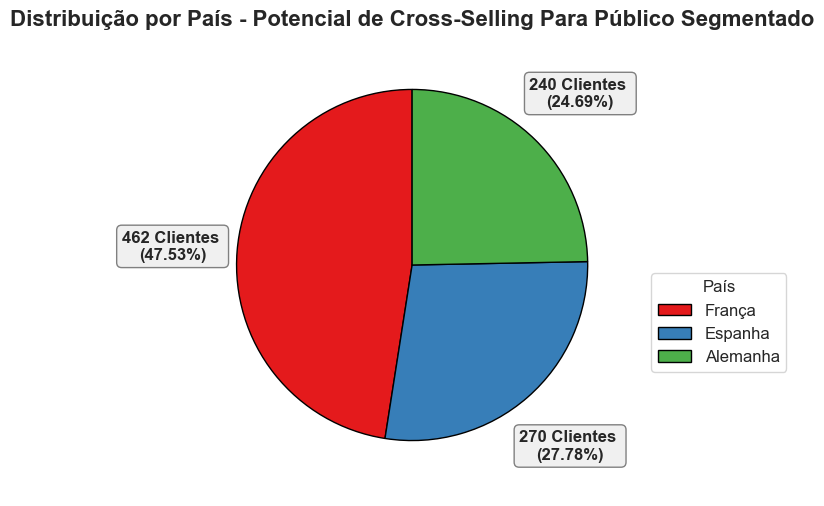

In [658]:
#Função p visualização de valores + percentual
def pct_formatado(pct, allvals):
    valor = int(round(pct/100. * float(sum(allvals))))
    return f'{valor:,.0f} Clientes \n({pct:.2f}%)'.replace(',', '.')

contagem_paises = df_ativos_potencial_crossSelling['Geography'].value_counts()
contagem_paises.index = contagem_paises.index.map({'France': 'França', 'Germany':'Alemanha', 'Spain':'Espanha'})


#Plot
fig, ax = plt.subplots(figsize=(8, 6))
sns.set_theme(style='whitegrid')
#sns.set_palette(palette='Set1')
wedges, texts, autotexts= plt.pie(
    contagem_paises,
    labels=None,
    autopct= lambda pct: pct_formatado(pct, contagem_paises),
    startangle=90,
    wedgeprops=dict(edgecolor='black'),
    textprops={'fontsize':12, 'weight': 'bold'},
    radius=0.95
)

#Posicionando os textos p fora do gráfico
for i, a in enumerate(autotexts):
    ang = (wedges[i].theta2 + wedges[i].theta1)/2.0
    x = np.cos(np.deg2rad(ang))
    y = np.sin(np.deg2rad(ang))
    a.set_position((1.3*x, 1.3*y))  # distância externa
    a.set_ha('center')
    a.set_va('center')
    a.set_fontsize(12)
    a.set_fontweight('bold')
    a.set_bbox(dict(boxstyle='round, pad=0.3', facecolor='#F0F0F0', edgecolor='gray'))

plt.legend(
    labels=contagem_paises.index,
    loc='best',
    bbox_to_anchor=(1.0, 0.5),
    title='País',
    fontsize=12
)

plt.title('Distribuição por País - Potencial de Cross-Selling Para Público Segmentado', fontsize=16, fontweight='bold', loc='center')

plt.show()

### Conclusão: Potencial de Cross-Selling entre Ativos Engajados
Com base nos critérios de **renda, saldo em conta, score de crédito e número de produtos**, identificamos um grupo expressivo de clientes ativos com **alto potencial para aquisição de novos produtos**. Esses clientes mantêm apenas um produto bancário ativo, mas apresentam perfil financeiro favorável, o que indica **espaço claro para ações de expansão do relacionamento**.

A segmentação por país — France, Germany e Spain — permite que as áreas regionais de marketing e CRM conduzam campanhas mais direcionadas, considerando particularidades culturais e econômicas de cada público.

***Essa identificação reforça a oportunidade de atuar de forma proativa com campanhas de cross-sell personalizadas, priorizando os clientes com maior potencial de retorno e aumentando a profundidade do vínculo com a instituição.***

---

### Oportunidades de Reativação entre Inativos
- Objetivo: Avaliar quais clientes inativos ainda apresentam sinais de valor ou histórico positivo que justifique ações de reativação.
- Variáveis-chave: NumOfProducts, EstimatedSalary, CreditScore, PointEarned, SatisfactionScore.
- Insight esperado: Priorizar clientes com potencial para ações personalizadas de CRM, reduzindo custos e aumentando chances de reconversão.

Para os clientes classificados como inativos, a análise será voltada a identificar quem já demonstrou bom relacionamento no passado ou ainda possui atrativos financeiros para o banco. A intenção é destacar perfis que podem ser mais receptivos a campanhas de reativação e estímulo ao retorno das atividades.

Esses clientes serão classificados em faixas etárias, a fim de segmentar ainda mais o CRM e marketing de reativação

In [659]:
# Para isso, vamos analisar os dados dos inativos e organizá-los com os de maior score de crédito e renda (clientes valiosos), quantos pontos eles têm e qual o grau de satisfação com o banco

condicoes_reativacao = (
    (df_inativos['Balance'] >= 10000) &
    (df_inativos['CreditScore'] >= 600) &
    (df_inativos['PointEarned'] >= 300) &
    (df_inativos['SatisfactionScore'] >= 3)
)

df_inativos_reativacao = df_inativos[condicoes_reativacao]
df_inativos_reativacao

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,SatisfactionScore,CardType,PointEarned
11,698,Germany,Male,44,10,116363.37,2,1,0,198059.16,0,0,4,SILVER,829
16,742,Germany,Male,35,5,136857.00,1,0,0,84509.57,0,0,4,GOLD,823
17,687,Germany,Female,27,9,152328.88,2,0,0,126494.82,0,0,5,DIAMOND,769
20,675,France,Female,21,8,98373.26,1,1,0,18203.00,0,0,5,SILVER,985
24,665,France,Female,34,1,96645.54,2,0,0,171413.66,0,0,3,DIAMOND,798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3533,758,France,Male,26,4,155739.76,1,1,0,171552.02,0,0,5,SILVER,757
3538,659,France,Male,36,6,123841.49,2,1,0,96833.00,0,1,5,PLATINUM,875
3540,714,Germany,Male,33,3,35016.60,1,1,0,53667.08,0,0,3,GOLD,791
3542,644,France,Male,28,7,155060.41,1,1,0,29179.52,0,0,5,DIAMOND,715


#### Após identificar os inativos com maior potencial de reativação, vamos segmentá-los a partir de faixas etárias de 20 a 30 anos, 30 a 40 e 40+ — com o objetivo de facilitar a personalização de campanhas por perfil geracional e perfil de consumo.

In [660]:
def classificar_faixa(idade):
    if idade < 30:
        return '20-30'
    elif idade < 40:
        return '30-40'
    else:
        return '40+'

df_inativos_reativacao['FaixaEtaria'] = df_inativos_reativacao['Age'].apply(classificar_faixa)

C:\Users\pedro\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == "__main__":


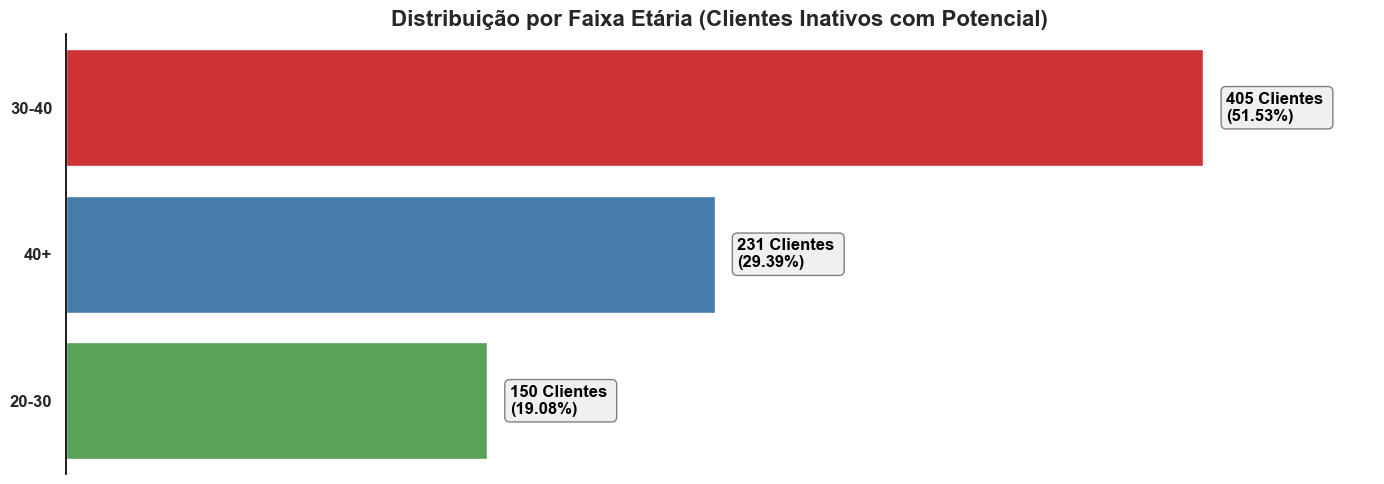

In [661]:
plt.figure(figsize=(14, 5))

# Frequência absoluta e percentual
freq_abs = df_inativos_reativacao['FaixaEtaria'].value_counts()
freq_pct = df_inativos_reativacao['FaixaEtaria'].value_counts(normalize=True) * 100

# Ordenação
freq_abs = freq_abs.sort_values(ascending=False)
freq_pct = freq_pct.loc[freq_abs.index]

#Plotagem
ax = sns.barplot(x=freq_abs.values, y=freq_abs.index, palette="Set1")

#Título e ticks eixo X e Y
plt.title('Distribuição por Faixa Etária (Clientes Inativos com Potencial)', fontsize=16, fontweight='bold')
plt.xlabel('')
plt.ylabel('')
ax.set_xticklabels('')
for label in ax.get_yticklabels():
    label.set_fontweight('bold')
    label.set_fontsize(12)
ax.grid(False)

#Ajustes dos eixos
max_val = max(freq_abs.values)
ax.set_xlim(0, max_val * 1.15)

# Anotações
for i, pct in enumerate(freq_pct.values):
    label = pct_formatado(pct, freq_abs.values)
    ax.text(freq_abs.values[i] + max_val * 0.02, i, label,
            va='center', ha='left', color='black', fontsize=12, fontweight='bold',
            bbox=dict(boxstyle='round, pad=0.3', facecolor='#F0F0F0', edgecolor='gray'))


#Spines
for spine in ax.spines.values():
    spine.set_visible(False)
    ax.spines['left'].set_visible(True)
    ax.spines['left'].set_color('black')


plt.tight_layout()
plt.show()


### Conclusão: Oportunidades de Reativação entre Inativos
Foi realizada uma análise aprofundada sobre os clientes inativos com potencial de reativação, considerando variáveis como Score de Satisfação, Score de Crédito, Número de Produtos, Renda Estimada e Pontuação de Fidelidade. A partir disso, identificamos um grupo prioritário de clientes com perfil favorável para ações de CRM personalizadas.

Ao segmentar esses clientes por faixa etária, observamos o seguinte:

- Faixa 30-40 anos (51,5%)
    - Esta é a principal faixa de idade entre os inativos com potencial. Trata-se de um público com maior estabilidade profissional e renda ativa, o que os torna altamente estratégicos para reengajamento via ofertas de valor agregado, como cashback, combos ou produtos premium.

- Faixa 40+ anos (29,4%)
    - Representa clientes maduros, possivelmente com histórico mais longo de relacionamento. Podem ter se tornado inativos por insatisfação pontual ou mudança de perfil de consumo. Campanhas de recuperação com foco em relacionamento, escuta ativa e benefícios exclusivos podem ser mais efetivas aqui.

- Faixa 20-30 anos (19,1%)
    - Embora menos numerosos, esses clientes jovens são importantes para o crescimento de longo prazo da base. Apresentam perfil digital e maior sensibilidade a experiências e programas de fidelidade. Ofertas modernas e comunicações em canais digitais são recomendadas para essa faixa.

Essa segmentação etária oferece subsídios claros para que o time de CRM direcione ações específicas e segmentadas de reativação, otimizando o esforço e aumentando a taxa de reconversão de clientes com real valor potencial.

---

### Riscos de Evasão no Grupo Ativo e Inativo
- **Objetivo**: Identificar sinais de churn nos clientes ainda na base.
- **Variáveis-chave**: CreditScore, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, SatisfactionScore, Complain e PointEarned.
- **Insight esperado**: Antecipar comportamentos semelhantes aos dos evadidos para criação de campanhas de retenção preventivas.

Para analisar os riscos de evasão entre os grupos Ativo e Inativo, vamos utilizar as variáveis *CreditScore, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, SatisfactionScore, Complain e PointEarned*, comparando seus padrões com os do grupo Evadido.

A partir dessa análise comparativa, vamos **identificar clientes com sinais leves, moderados ou fortes de evasão**. Com isso, segmentaremos os ativos e inativos em dois subgrupos:

- Um com leves indicativos de churn, que merece atenção e acompanhamento;
- Outro com alguns indicativos de churn, merece uma atenção maior e acompanhamento de perto;
- O último com fortes evidências de que irão encerrar a conta, demandando ações imediatas de retenção.

Essa abordagem nos permitirá priorizar campanhas preventivas com base no grau de risco de cada cliente, otimizando os esforços de relacionamento e fidelização.

In [662]:
lista_risco_evasao = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'SatisfactionScore', 'Complain', 'PointEarned']


df_ativos_risco_evasao = df_ativos[lista_risco_evasao]
df_inativos_risco_evasao = df_inativos[lista_risco_evasao]
df_evadidos_risco_evasao = df_evadidos[lista_risco_evasao]

print("\n### Grupo Ativo")
display(df_ativos_risco_evasao.head())

print("\n### Grupo Inativo")
display(df_inativos_risco_evasao.head())

print("### Grupo Evadido")
display(df_evadidos_risco_evasao.head())


### Grupo Ativo


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,SatisfactionScore,Complain,PointEarned
0,608,41,1,83807.86,1,0,1,3,1,456
1,850,43,2,125510.82,1,1,1,5,0,425
2,822,50,7,0.00,2,1,1,2,0,206
3,501,44,4,142051.07,2,0,1,3,0,251
4,684,27,2,134603.88,1,1,1,3,0,342



### Grupo Inativo


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,SatisfactionScore,Complain,PointEarned
0,699,39,1,0.00,2,0,0,5,0,350
1,528,31,6,102016.72,2,0,0,3,0,264
2,497,24,3,0.00,2,1,0,3,0,249
3,476,34,10,0.00,2,1,0,3,0,119
4,549,25,5,0.00,2,0,0,3,0,549


### Grupo Evadido


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,SatisfactionScore,Complain,PointEarned
0,619,42,2,0.00,1,1,1,2,1,464
1,502,42,8,159660.80,3,1,0,3,1,377
2,645,44,8,113755.78,2,1,0,5,1,484
3,376,29,4,115046.74,4,1,0,2,1,282
4,653,58,1,132602.88,1,1,0,2,0,163


#### Com as colunas relevantes selecionadas, o próximo passo é identificar quantos perfis dos grupos Ativo e Inativo apresentam características semelhantes às dos clientes Evadidos.

In [663]:
# Para isso, vamos ver as médias de valores dos evadidos para tomarmos como base.
for coluna in df_evadidos_risco_evasao.columns:
    media = df_evadidos_risco_evasao[coluna].mean()
    print(f'{coluna}: {media:.2f}')

CreditScore: 645.41
Age: 44.84
Tenure: 4.93
Balance: 91109.48
NumOfProducts: 1.48
HasCrCard: 0.70
IsActiveMember: 0.36
SatisfactionScore: 3.00
Complain: 1.00
PointEarned: 604.45


#### A estratégia aqui é atribuírmos **pontos de risco** para cada condição típica de churn (com base nos padrões dos evadidos). Quanto mais condições, maior o risco:

Cada condição que for verdadeira soma 1 ponto:

- CreditScore <= 600
- Tenure <= 5
- NumOfProducts <= 1
- SatisfactionScore <= 3
- Complain == 1

Depois:
- 0 a 1 pontos → Baixo risco
- 2 a 3 pontos → Médio risco
- 4 a 5 pontos → Alto risco

In [664]:
def classificar_risco(df):
    # Calculando o score de risco para cada linha
    risco_score = (
        (df['CreditScore'] <= 600).astype(int) +
        (df['Tenure'] <= 5).astype(int) +
        (df['NumOfProducts'] <= 1).astype(int) +
        (df['SatisfactionScore'] <= 3).astype(int) +
        (df['Complain'] == 1).astype(int)
    )

    # Classificando os níveis de risco
    condicoes = [
        risco_score <= 1,
        risco_score.between(2, 3),
        risco_score >= 4
    ]
    categorias = ['Baixo', 'Médio', 'Alto']

    return pd.Series(np.select(condicoes, categorias, default='Baixo'), index=df.index)

# Aplicando aos grupos
df_ativos['RiscoChurn'] = classificar_risco(df_ativos)
df_inativos['RiscoChurn'] = classificar_risco(df_inativos)

# Visualizando os resultados
print("### Ativos por nível de risco:")
display(df_ativos['RiscoChurn'].value_counts())

print("\n### Inativos por nível de risco:")
display(df_inativos['RiscoChurn'].value_counts())

# Visualizando separadamente os clientes de alto risco:
display(df_ativos[df_ativos['RiscoChurn'] == 'Alto'])
display(df_inativos[df_inativos['RiscoChurn'] == 'Alto'])


### Ativos por nível de risco:


Médio    2754
Baixo    1476
Alto      186
Name: RiscoChurn, dtype: int64


### Inativos por nível de risco:


Médio    2154
Baixo    1222
Alto      170
Name: RiscoChurn, dtype: int64

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,SatisfactionScore,CardType,PointEarned,RiscoChurn
0,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456,Alto
23,556,France,Female,61,2,117419.35,1,1,1,94153.83,0,0,3,PLATINUM,789,Alto
26,550,Germany,Male,38,2,103391.38,1,0,1,90878.13,0,0,3,DIAMOND,960,Alto
61,461,Germany,Female,34,5,63663.93,1,0,1,167784.28,0,0,1,SILVER,497,Alto
88,550,France,Male,37,3,0.00,1,1,1,179670.31,0,0,3,GOLD,516,Alto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4309,445,France,Male,64,2,136770.67,1,0,1,43678.06,0,0,3,DIAMOND,650,Alto
4311,480,Spain,Male,39,5,121626.90,1,1,1,82438.13,0,0,1,SILVER,462,Alto
4324,600,Germany,Male,30,2,119755.00,1,1,1,21852.91,0,0,1,DIAMOND,910,Alto
4338,584,France,Male,38,1,115341.55,1,0,1,173632.92,0,0,2,DIAMOND,665,Alto


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,SatisfactionScore,CardType,PointEarned,RiscoChurn
19,581,Germany,Female,34,1,101633.04,1,1,0,110431.51,0,1,3,PLATINUM,469,Alto
53,539,France,Male,37,2,127609.59,1,1,0,98646.22,0,0,1,DIAMOND,620,Alto
60,484,France,Female,29,4,130114.39,1,1,0,164017.89,0,0,1,GOLD,249,Alto
62,578,France,Male,30,4,169462.09,1,1,0,112187.11,0,1,5,DIAMOND,872,Alto
73,512,Spain,Male,33,3,176666.62,1,1,0,94670.77,0,0,1,PLATINUM,726,Alto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3396,508,France,Male,35,1,86893.28,1,0,0,59374.82,0,0,2,SILVER,408,Alto
3419,469,France,Male,33,1,127818.52,1,1,0,163477.22,0,0,1,PLATINUM,933,Alto
3489,459,France,Male,26,4,149879.66,1,0,0,50016.17,0,0,1,DIAMOND,872,Alto
3498,584,Germany,Male,42,3,137479.13,1,1,0,25669.10,0,0,3,PLATINUM,534,Alto


In [665]:
# Combinando os ativos e inativos em um único DataFrame com a coluna 'Status'
df_ativos['Status'] = 'Ativo'
df_inativos['Status'] = 'Inativo'
df_risco_total = pd.concat([df_ativos, df_inativos])

# Contando os valores por grupo
contagem_risco = df_risco_total.groupby(['RiscoChurn', 'Status']).size().reset_index(name='Quantidade')

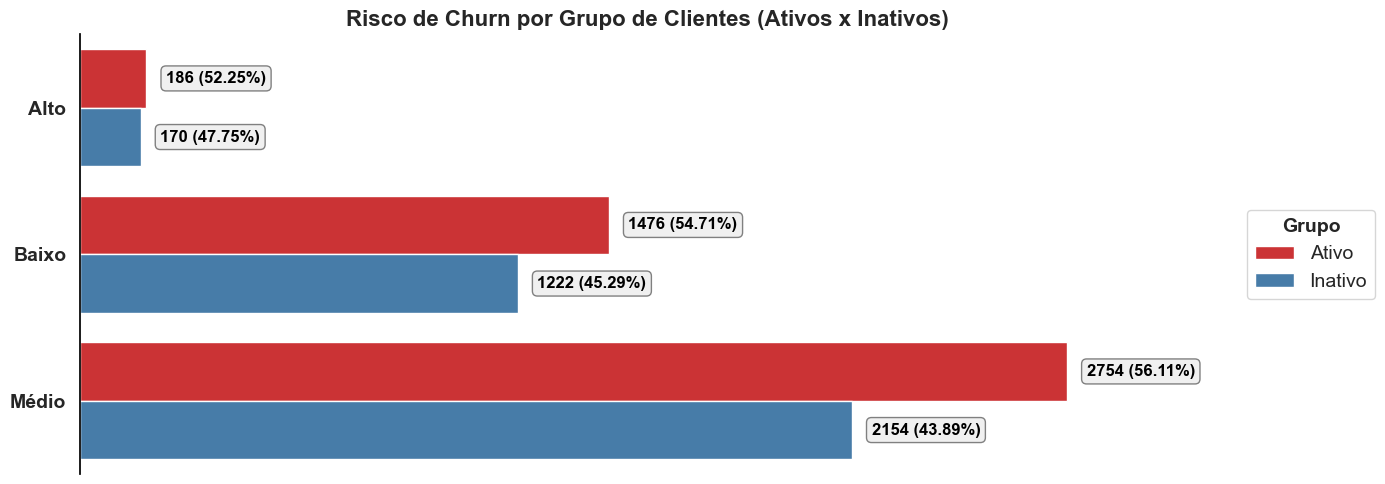

In [722]:
# A partir disso, vamos plotar nosso gráfico de barras
plt.figure(figsize=(14, 5))
ax = sns.barplot(data=contagem_risco, x='Quantidade', y='RiscoChurn', hue='Status')
sns.set_palette(palette='Set1')

#Título e eixos 
plt.title('Risco de Churn por Grupo de Clientes (Ativos x Inativos)', fontsize=16, fontweight='bold')
plt.xlabel('')
plt.ylabel('')
ax.set_xticklabels('')
ax.grid(False)


#Ajuste Eixos
max_val = contagem_risco['Quantidade'].max()
ax.set_xlim(0, max_val * 1.15)

for label in ax.get_yticklabels():
    label.set_fontweight('bold')
    label.set_fontsize(14)


#Cálculo de percentual por grupo e anotações
total = contagem_risco.groupby('RiscoChurn')['Quantidade'].sum()

# Inserindo as anotações diretamente sobre as barras
for bar in ax.patches:
    width = bar.get_width()
    y = bar.get_y() + bar.get_height() / 2

    # Encontrando a linha correspondente na base original
    for i, row in contagem_risco.iterrows():
        if np.isclose(width, row['Quantidade']) and np.isclose(y, bar.get_y() + bar.get_height() / 2):
            total_categoria = total[row['RiscoChurn']]
            pct = (row['Quantidade'] / total_categoria) * 100
            label = f'{row["Quantidade"]} ({pct:.2f}%)'
            break
    ax.text(
        width + max_val * 0.02,
        y,
        label,
        va='center', ha='left', color='black', fontsize=12, fontweight='bold',
        bbox=dict(boxstyle='round, pad=0.3', facecolor='#F0F0F0', edgecolor='gray')
    )

for spine in ax.spines.values():
    spine.set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['left'].set_color('black')

plt.legend(
    title='Grupo',
    loc='center left',
    bbox_to_anchor=(1.02, 0.5),
    fontsize=14,
    title_fontproperties={'size':14, 'weight': 'bold'}
)

plt.tight_layout()
plt.show()

### Conclusão: Riscos de Evasão no Grupo Ativo e Inativo

A partir da análise de variáveis como satisfação, número de produtos, reclamações, tempo de relacionamento e engajamento, foi possível classificar os clientes ativos e inativos em três níveis de risco de evasão: Alto, Médio e Baixo.

O gráfico de barras evidencia que a maior concentração de clientes — tanto ativos quanto inativos — está no grupo de risco médio, o que indica que boa parte da base está em uma zona de alerta, com potenciais sinais de insatisfação ou desengajamento, mas ainda com possibilidade de retenção.

Os principais destaques são:

- **Risco Alto**: Embora represente a menor parte da base, este grupo reúne clientes com múltiplos fatores críticos — como baixa satisfação, histórico de reclamações e engajamento reduzido. Eles exigem ações emergenciais de retenção, especialmente entre os ativos, para evitar churn iminente.

- **Risco Médio**: A faixa mais numerosa dos clientes. São perfis com algum grau de risco, mas também com margem de recuperação. Campanhas de reengajamento, escuta ativa e ofertas personalizadas podem ser decisivas para manter esses clientes na base.

- **Risco Baixo**: Clientes mais estáveis, com maior satisfação e bom relacionamento. Apesar disso, devem ser acompanhados de forma contínua para evitar quedas de engajamento.

Essa classificação permite à área de relacionamento e fidelização atuar de forma antecipada e estratégica, com campanhas segmentadas por grau de risco e status atual do cliente (ativo ou inativo), otimizando recursos e priorizando os casos com maior urgência de ação.

## Relatório Final

A análise realizada permitiu identificar padrões relevantes entre os clientes ativos, inativos e evadidos, possibilitando a construção de perfis com base em variáveis comportamentais e financeiras.

Os principais fatores associados ao risco de evasão foram:

- Reclamações registradas (quase 100% dos evadidos)
- Baixo nível de satisfação com o banco
- Participação limitada nos produtos oferecidos
- Membros pouco ativos, ainda que com saldo considerável

*Adicionalmente, observamos que o grupo de evadidos possui idade média mais alta e perfil financeiro sólido, indicando que a evasão não está ligada à falta de recursos, mas sim à experiência insatisfatória com o serviço.*

Com base nesses padrões, foi possível aplicar um modelo de risco sobre os clientes ativos e inativos, destacando aqueles com comportamento semelhante ao dos que já abandonaram o banco.

## Recomendações
- **Implementar ações preventivas de retenção, especialmente para clientes com baixo nível de satisfação ou com histórico de reclamações.**
- **Reforçar o relacionamento com clientes inativos com bom potencial financeiro, oferecendo produtos mais aderentes ao seu perfil.**
- **Monitorar continuamente os indicadores de engajamento, como participação em produtos, uso de cartão e pontuação de satisfação.**
- **Utilizar o modelo de perfil traçado para antecipar comportamentos de evasão e priorizar atendimentos mais personalizados.**


*Essas estratégias podem reduzir significativamente o churn e aumentar o valor de vida do cliente, contribuindo para uma gestão mais eficiente da base e um melhor aproveitamento das oportunidades comerciais.*